In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('births.csv')

In [4]:
# Basic info
print("Dataset Info:")
print(df.info(), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB
None 



In [5]:
# Descriptive statistics
print("Summary Statistics:")
print(df.describe(), "\n")

Summary Statistics:
               year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000 



In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

Missing Values:
year        0
month       0
day       480
gender      0
births      0
dtype: int64 



In [7]:
# Births by gender
gender_counts = df.groupby('gender')['births'].sum()
print("Total Births by Gender:")
print(gender_counts, "\n")

Total Births by Gender:
gender
F    74035823
M    77738555
Name: births, dtype: int64 



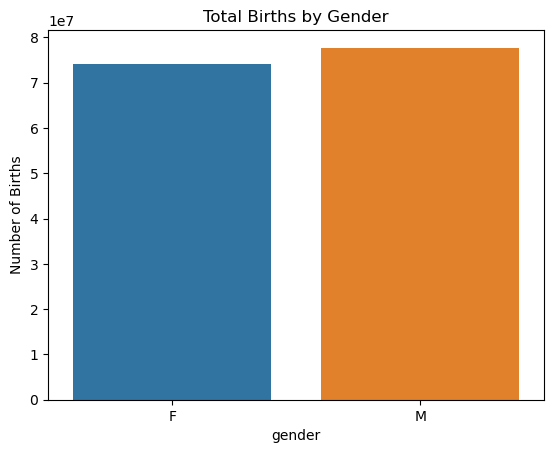

In [8]:
# Plot: Total births by gender
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title("Total Births by Gender")
plt.ylabel("Number of Births")
plt.show()

In [9]:
# Monthly birth trends
monthly_births = df.groupby('month')['births'].sum()
print("Monthly Birth Trends:")
print(monthly_births, "\n")

Monthly Birth Trends:
month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64 



/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


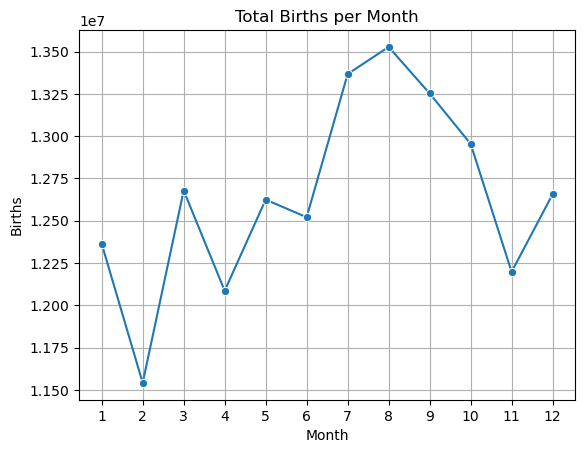

In [10]:
# Plot: Monthly birth trends
sns.lineplot(x=monthly_births.index, y=monthly_births.values, marker='o')
plt.title("Total Births per Month")
plt.xlabel("Month")
plt.ylabel("Births")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [11]:
# Yearly birth trends
yearly_births = df.groupby('year')['births'].sum()
print("Yearly Birth Trends:")
print(yearly_births, "\n")

Yearly Birth Trends:
year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64 



/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


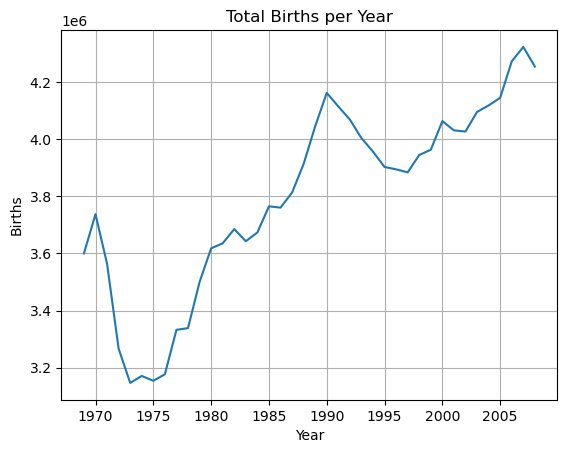

In [12]:
# Plot: Yearly birth trends
sns.lineplot(x=yearly_births.index, y=yearly_births.values)
plt.title("Total Births per Year")
plt.xlabel("Year")
plt.ylabel("Births")
plt.grid(True)
plt.show()

/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


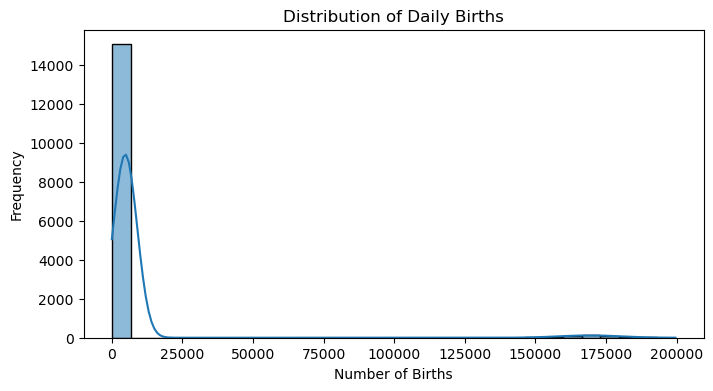

In [13]:
# Distribution of births
plt.figure(figsize=(8, 4))
sns.histplot(df['births'], bins=30, kde=True)
plt.title("Distribution of Daily Births")
plt.xlabel("Number of Births")
plt.ylabel("Frequency")
plt.show()